In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 导入
with open('book.txt', 'r', encoding='utf-8') as file: 
    # 将分隔符全部统一然后去掉
    lists = [line.strip().replace('"',' ').replace(' ',' ').replace('[',' ').replace(']',' ').split(',') for line in file]    
print(lists)

[['  https://book.douban.com/subject/1007305/ ', '  https://book.douban.com/subject/4913064/ ', '  https://book.douban.com/subject/4820710/ ', '  https://book.douban.com/subject/24531956/ ', '  https://book.douban.com/subject/6518605/ ', '  https://book.douban.com/subject/6082808/ ', '  https://book.douban.com/subject/1068920/ ', '  https://book.douban.com/subject/2035179/ ', '  https://book.douban.com/subject/27614904/ ', '  https://book.douban.com/subject/1019568/ ', '  https://book.douban.com/subject/1040211/ ', '  https://book.douban.com/subject/10554308/ ', '  https://book.douban.com/subject/1084336/ ', '  https://book.douban.com/subject/1046209/ ', '  https://book.douban.com/subject/1255625/ ', '  https://book.douban.com/subject/1060068/ ', '  https://book.douban.com/subject/1449351/ ', '  https://book.douban.com/subject/20424526/ ', '  https://book.douban.com/subject/26980487/ ', '  https://book.douban.com/subject/6781808/ ', '  https://book.douban.com/subject/30172069/ ', '  ht

In [3]:
# 转成DataFrame格式并转置
df = pd.DataFrame(lists).transpose()

In [4]:
# 修改列索引
df = df.rename(columns={0:'href',1:'name',2: 'star',3:'comment'})   
df['star'] = df['star'].astype(float)
df['comment'] = df['comment'].astype(float)
# 使用insert()方法在最前面（即第一列）添加排名列  
df.insert(0, 'rank', pd.Series(range(1, len(df) + 1))) 

# 加入new_col判断评分超过9.1分的书籍
df['new_col'] = df.apply(lambda df: 1 if df['star'] >= 9.1 else 0, axis=1)
df

,rank,href,name,star,comment,new_col
0,1,https://book.douban.com/subject/1007305/,红楼梦,9.6,425408.0,1
1,2,https://book.douban.com/subject/4913064/,活着,9.4,836857.0,1
2,3,https://book.douban.com/subject/4820710/,1984,9.4,285680.0,1
3,4,https://book.douban.com/subject/24531956/,哈利·波特,9.7,108130.0,1
4,5,https://book.douban.com/subject/6518605/,三体全集:地球往事三部曲,9.5,188720.0,1
...,...,...,...,...,...,...
245,246,https://book.douban.com/subject/35494160/,挽救计划,9.1,12285.0,1
246,247,https://book.douban.com/subject/26861418/,奥斯维辛:一部历史,9.5,9899.0,1
247,248,https://book.douban.com/subject/1006197/,哈姆莱特,8.7,50609.0,0
248,249,https://book.douban.com/subject/25897678/,包法利夫人,9.1,23129.0,1


In [5]:
# 统计缺失值
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rank     250 non-null    int64  
 1   href     250 non-null    object 
 2   name     250 non-null    object 
 3   star     250 non-null    float64
 4   comment  250 non-null    float64
 5   new_col  250 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 11.8+ KB


None

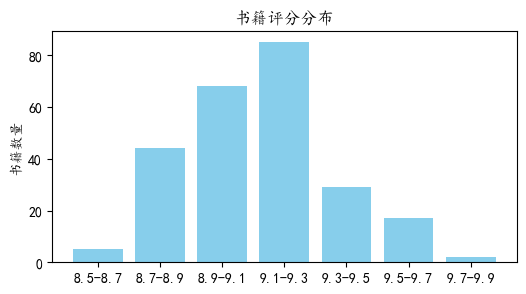

In [6]:
import matplotlib
# 正常显示中文
matplotlib.rcParams['font.family'] = 'Kaiti'
bins = [8.5, 8.7, 8.9, 9.1, 9.3, 9.5, 9.7, 9.9]  # 边界值，不包含上限  
labels = ['8.5-8.7', '8.7-8.9', '8.9-9.1', '9.1-9.3', '9.3-9.5', '9.5-9.7', '9.7-9.9']

plt.figure(figsize=(6,3))

counts = plt.hist((df['star']), bins=bins, align='mid', rwidth=0.8, color='skyblue')    
# 计算每个bin的中心点
edge = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]

# 设置x轴标签 
plt.xticks(edge, labels)    
# 设置标题和y轴标签  
plt.title('书籍评分分布')  
plt.ylabel('书籍数量')   
# 显示图形  
plt.show()

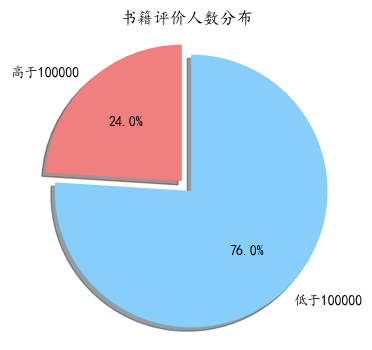

In [8]:
df1 = df
df1['comment'] = df1['comment']
above = df1.query('comment >= 100000')
below = df1.query('comment < 100000')

count_above = len(above)  
count_below = len(below) 

# 绘制饼状图  
labels = ['高于100000', '低于100000']  
sizes = [count_above, count_below]  
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # 突出显示第一组  
  
# 创建饼状图  
plt.figure(figsize=(4, 4))  
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',  shadow=True, startangle=90)  
  
# 设置标题和轴标签  
plt.title('书籍评价人数分布')  
  
# 显示图形  
plt.axis('equal')  # 确保饼状图是圆形的  
plt.show()

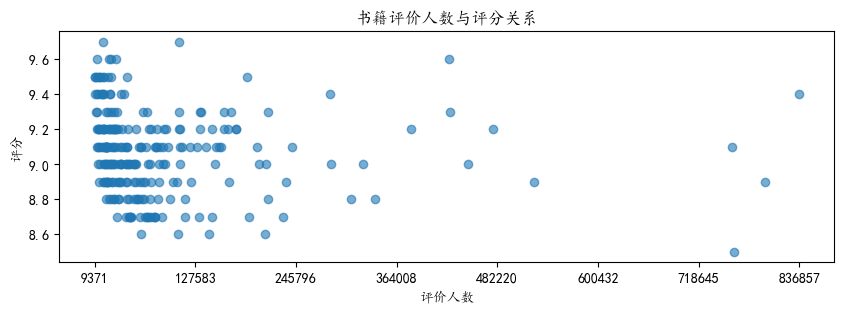

In [7]:
plt.figure(figsize=(10, 3))

# 将数据转成float才可以保证散点图坐标轴的刻度不乱序 
plt.scatter(df['comment'], df['star'], alpha=0.6) 

ticks = np.linspace(min(df['comment']), max(df['comment']), num=8)  
# 设置x轴的刻度和标签  
plt.xticks(ticks)

# 设置图形标题和坐标轴标签  
plt.title('书籍评价人数与评分关系')  
plt.xlabel('评价人数')  
plt.ylabel('评分')  
# 显示图形  
plt.show()

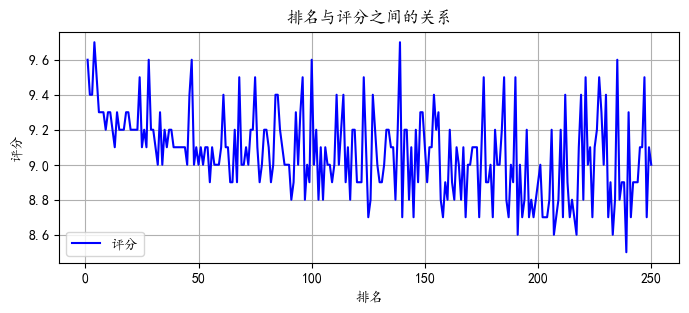

In [9]:
plt.figure(figsize=(8, 3))  
# 绘制折线图  
plt.plot(df['rank'], df['star'], linestyle='-', color='blue', label='评分')  
 
# 添加标题和轴标签  
plt.title('排名与评分之间的关系')  
plt.xlabel('排名')  
plt.ylabel('评分')   
plt.legend()    
# 显示网格  
plt.grid(True) 

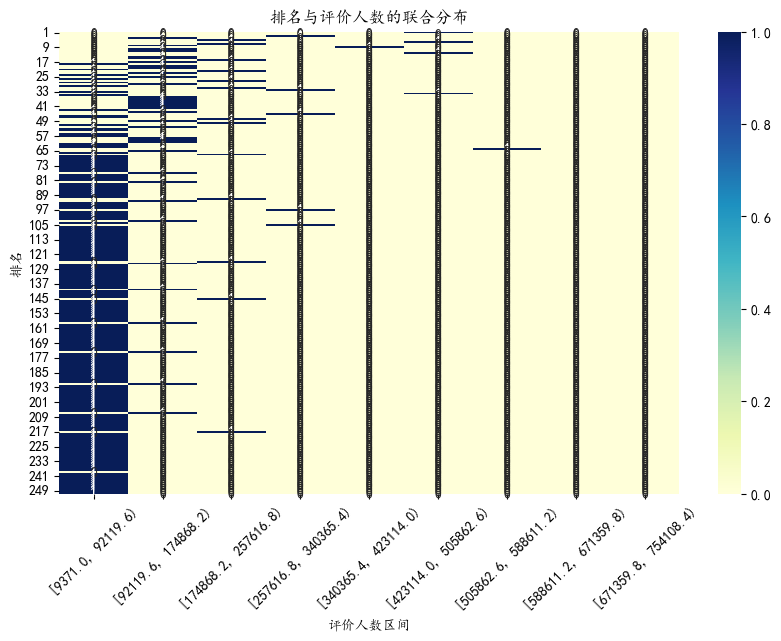

In [10]:
import seaborn as sns
# 定义评价人数的区间边界  
bins = np.linspace(min(df['comment']), max(df['comment']), 10, endpoint=False)  # 10个区间，9个边界  
  # 转换为整数边界，便于显示 
bin_edges = [int(b) for b in bins] 
  
# 将评价人数分箱  
df['Comments_bin'] = pd.cut(df['comment'], bins=bins, right=False)  
  
# 创建交叉表  
pivot_table = df.pivot_table(index='rank', columns=df['Comments_bin'], aggfunc='size', fill_value=0)  
  
# 因为pivot_table的列是区间标签，我们可以直接使用它们作为标签  
# 但如果你想显示为数值范围，你可以从区间的边界创建它们  
bin_labels = [f'[{bin_edges[i]},{bin_edges[i+1] if i < len(bin_edges)-1 else "∞"})' for i in range(len(bin_edges)-1)]  
  
# 绘制热力图  
plt.figure(figsize=(10, 6))  
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')  
# 旋转x轴标签
plt.xticks(rotation=45)    
plt.xlabel('评价人数区间')  
plt.ylabel('排名')  
plt.title('排名与评价人数的联合分布')  
plt.show()

In [11]:
# 逻辑回归 
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import classification_report  

X = df[['rank','comment']]
y = df['new_col']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
clf = LogisticRegression()  

# 训练模型  
clf.fit(X_train, y_train)  
  
# 预测测试集的结果  
y_pred = clf.predict(X_test)  
  
# 评估模型性能  
print("Accuracy:", clf.score(X_test, y_test))  
print("Classification Report:")  
print(classification_report(y_test, y_pred))

Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.89      0.76        27
           1       0.79      0.48      0.59        23

    accuracy                           0.70        50
   macro avg       0.73      0.68      0.68        50
weighted avg       0.72      0.70      0.68        50

